In [ ]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler,LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

In [ ]:
df=pd.read_csv("fraud_data.csv")
df.head()

,ID,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud
0,1,487,TRANSFER,321307.31,C509024717,321307.31,0.00,C136074678,0.00,0.00,1
1,2,160,TRANSFER,10000000.00,C752627210,27670038.08,17670038.08,C1853789265,0.00,0.00,1
2,3,40,CASH_OUT,94684.22,C999271610,0.00,0.00,C269348569,100443.55,195127.77,0
3,4,139,CASH_OUT,61572.27,C2098314951,416524.00,354951.73,C1093723175,126019.53,187591.80,0
4,5,526,TRANSFER,682901.78,C50452950,0.00,0.00,C2102114319,748928.26,1431830.04,0


In [ ]:
df.shape

(18213, 11)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18213 entries, 0 to 18212
Data columns (total 11 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   ID              18213 non-null  int64  
 1   step            18213 non-null  int64  
 2   type            18213 non-null  object 
 3   amount          18213 non-null  float64
 4   nameOrig        18213 non-null  object 
 5   oldbalanceOrg   18213 non-null  float64
 6   newbalanceOrig  18213 non-null  float64
 7   nameDest        18213 non-null  object 
 8   oldbalanceDest  18213 non-null  float64
 9   newbalanceDest  18213 non-null  float64
 10  isFraud         18213 non-null  int64  
dtypes: float64(5), int64(3), object(3)
memory usage: 1.5+ MB


In [ ]:
df.describe()

,ID,step,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,isFraud
count,18213.000000,18213.000000,1.821300e+04,1.821300e+04,1.821300e+04,1.821300e+04,1.821300e+04,18213.000000
mean,9107.000000,300.244441,7.624918e+05,1.200076e+06,5.546390e+05,8.655575e+05,1.269872e+06,0.450942
std,5257.784562,190.009780,1.824941e+06,3.222081e+06,2.551140e+06,3.286398e+06,3.738408e+06,0.497601
min,1.000000,1.000000,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000
25%,4554.000000,161.000000,3.266058e+04,7.087000e+03,0.000000e+00,0.000000e+00,0.000000e+00,0.000000
50%,9107.000000,280.000000,1.593057e+05,1.001090e+05,0.000000e+00,0.000000e+00,1.422921e+05,0.000000
75%,13660.000000,402.000000,4.753156e+05,6.991836e+05,0.000000e+00,5.530399e+05,1.107620e+06,1.000000
max,18213.000000,743.000000,5.199086e+07,5.958504e+07,4.958504e+07,2.362305e+08,2.367265e+08,1.000000


In [ ]:
df.isna().sum()

ID                0
step              0
type              0
amount            0
nameOrig          0
oldbalanceOrg     0
newbalanceOrig    0
nameDest          0
oldbalanceDest    0
newbalanceDest    0
isFraud           0
dtype: int64

In [ ]:
df = df.dropna()

In [ ]:
df.duplicated().sum()

0

In [ ]:
df = df.drop_duplicates()

In [ ]:
df.shape

In [ ]:
num_cols = df.iloc[:,1:-1].select_dtypes(exclude='object').columns.values
num_cols

array(['step', 'amount', 'oldbalanceOrg', 'newbalanceOrig',
       'oldbalanceDest', 'newbalanceDest'], dtype=object)

In [ ]:
le = LabelEncoder()

In [ ]:
for i in df.iloc[:,1:-1].columns:
    if df[i].dtype == 'object':
        df[i] = le.fit_transform(df[i])

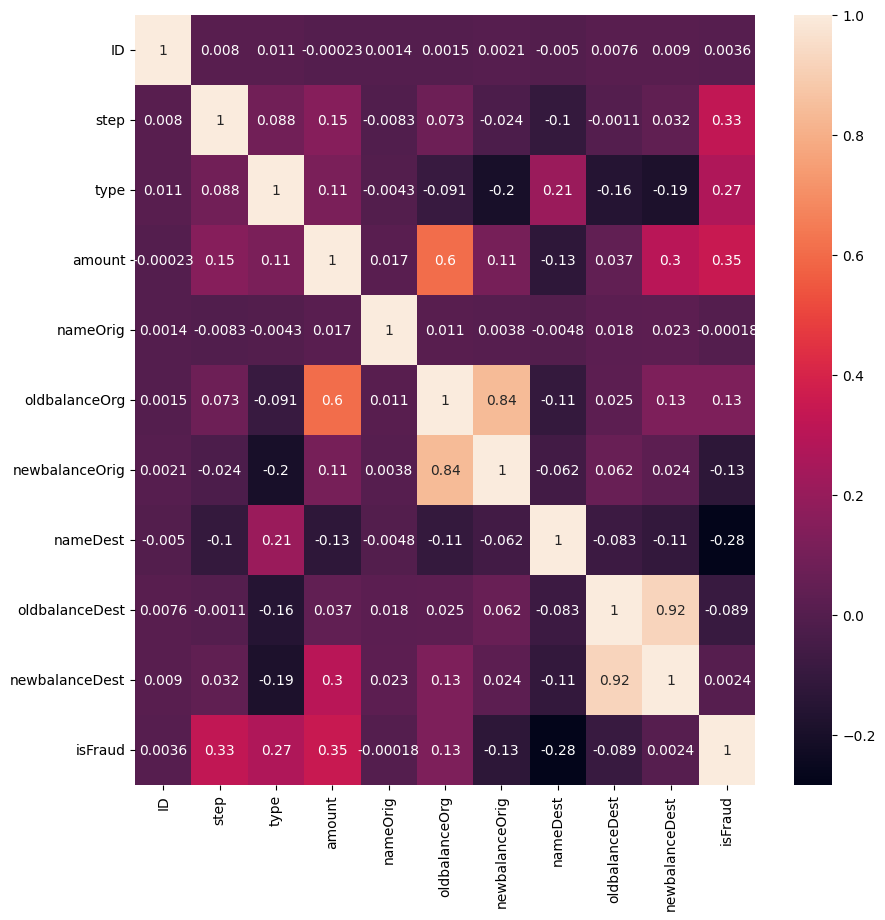

In [ ]:
plt.figure(figsize=(10,10))
sns.heatmap(df.corr(),annot=True)
plt.show()

In [ ]:
# Divide the data into “Attributes” and “labels”
X = df.iloc[:,1:-1]
y = df.iloc[:,-1]

In [ ]:
y.value_counts()

0    10000
1     8213
Name: isFraud, dtype: int64

In [ ]:
le = LabelEncoder()
y = le.fit_transform(y)

In [ ]:
# Split 80% of the data to the training set while 20% of the data to test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

In [ ]:
sc = StandardScaler()
X_train[num_cols] = sc.fit_transform(X_train[num_cols])
X_test[num_cols] = sc.fit_transform(X_test[num_cols])

In [ ]:
X_test

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest
3539,-0.655273,4,-0.086491,5164,-0.189389,-0.219999,6947,-0.277649,-0.332867
7436,-0.884944,3,-0.385374,16527,-0.214510,-0.025591,17272,-0.277649,-0.332867
13448,-0.770109,3,-0.381499,5934,-0.182832,0.011293,15113,-0.277649,-0.332867
14384,-0.258567,1,-0.367453,5561,-0.372198,-0.219999,1411,-0.246836,-0.296054
9049,-0.216809,1,0.770645,9906,0.326245,-0.219999,3145,1.684900,1.857604
...,...,...,...,...,...,...,...,...,...
4974,1.260397,3,-0.388983,17809,-0.372198,-0.219999,17734,-0.277649,-0.332867
119,0.153797,1,-0.273525,13180,-0.362987,-0.219999,2791,-0.242648,-0.244173
5583,1.077703,4,-0.173425,4830,-0.241686,-0.219999,1958,-0.277649,-0.332867
17310,-0.190710,4,4.788973,10232,4.455665,1.931803,6087,-0.277649,-0.332867


In [ ]:
# Create a Linear Regression model and fit it
lr =LogisticRegression()
model = lr.fit(X_train,y_train)

In [ ]:
# Predicting the data
y_predict=model.predict(X_test)
y_predict

array([1, 0, 0, ..., 1, 1, 0])

In [ ]:
from sklearn.metrics import accuracy_score
accuracy_score(y_predict,y_test)

0.7696953060664288

In [ ]:
DT=DecisionTreeClassifier()
dt=DT.fit(X_train,y_train)
dt_pred=dt.predict(X_test)
dt_acc_score=accuracy_score(y_test,dt_pred)*100
(dt_acc_score)

85.23195168816909

In [ ]:
from sklearn.svm import SVC
svm = SVC()
svm.fit(X_train, y_train)
y_pred_svm = svm.predict(X_test)
svm_acc_score = accuracy_score(y_test, y_pred_svm) * 100
print(f"SVM Accuracy: {svm_acc_score:.2f}%")

SVM Accuracy: 63.74%


In [ ]:
RF=RandomForestClassifier()
rf=RF.fit(X_train,y_train)
rf_pred=rf.predict(X_test)
rf_acc_score=accuracy_score(y_test,rf_pred)*100
(rf_acc_score)

90.0082349711776

In [ ]:
from sklearn.naive_bayes import GaussianNB
nb = GaussianNB()
nb.fit(X_train, y_train)
y_pred_nb = nb.predict(X_test)
nb_acc_score = accuracy_score(y_test, y_pred_nb) * 100
print(f"Naive Bayes Accuracy: {nb_acc_score:.2f}%")

Naive Bayes Accuracy: 73.90%


In [ ]:
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier()
knn.fit(X_train, y_train)
y_pred_knn = knn.predict(X_test)
knn_acc_score = accuracy_score(y_test, y_pred_knn) * 100
print(f"KNN Accuracy: {knn_acc_score:.2f}%")

KNN Accuracy: 59.40%


In [ ]:

from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier()
knn.fit(X_train, y_train)
y_pred_knn = knn.predict(X_test)
knn_acc_score = accuracy_score(y_test, y_pred_knn) * 100
print(f"KNN Accuracy: {knn_acc_score:.2f}%")

KNN Accuracy: 59.40%
